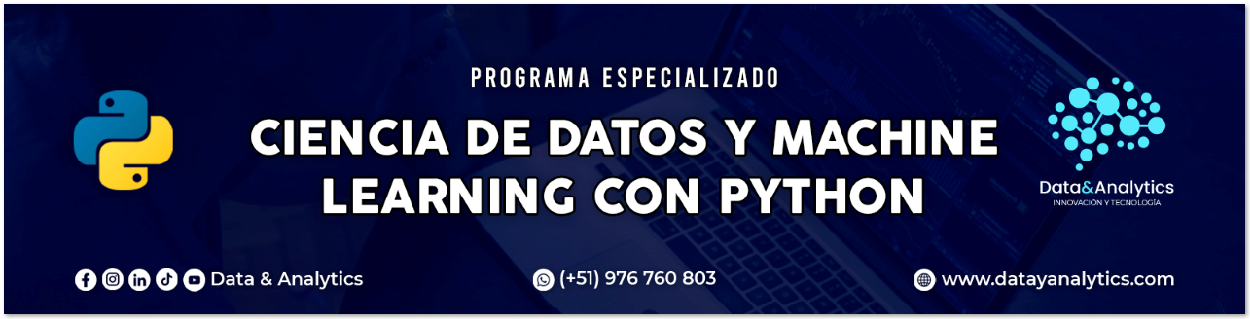

#DATA & ANALYTICS



----------------------------
SESIÓN N°2: Introducción a Machine Learning

Instructor: 

E-mail: cursos@datayanalytics.com

Web: www.datayanalytics.com

# Modelos predictivos bajo el enfoque de regresión

La regresión lineal es el algoritmo más simple en el aprendizaje automático, se puede entrenar de diferentes maneras. En este Notebook cubriremos los siguientes algoritmos lineales:

1. Regresión lineal
2. Regresión de Ridge
3. Regresión LASSO
4. Elastic Net
5. Regresión polinomial
6. Descenso de gradiente estocástico
7. Redes neuronales artificiales

Vamos a utilizar el conjunto de datos `USA_Housing`. Dado que el precio de la vivienda es una variable continua, se trata de un problema de regresión.

Los datos contienen las siguientes columnas:



* '`Avg. Area Income`': Promedio de ingresos de los residentes de la ciudad donde se ubica la casa.
* '`Avg. Area House Age`': Edad promedio de las casas en la misma ciudad.
* '`Avg. Area Number of Rooms`': Número promedio de habitaciones para casas en la misma ciudad.
* '`Avg. Area Number of Bedrooms`': Número medio de dormitorios para casas en la misma ciudad.
* '`Area Population`': La población de la ciudad donde se encuentra la vivienda.
* '`Price`': Precio al que se vendió la casa.
* '`Address`': Dirección de la casa.


# Importando librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Cargando la data

In [ ]:
USAhousing = pd.read_csv('/content/drive/MyDrive/Data/USA_Housing.csv')
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Análisis exploratorio

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


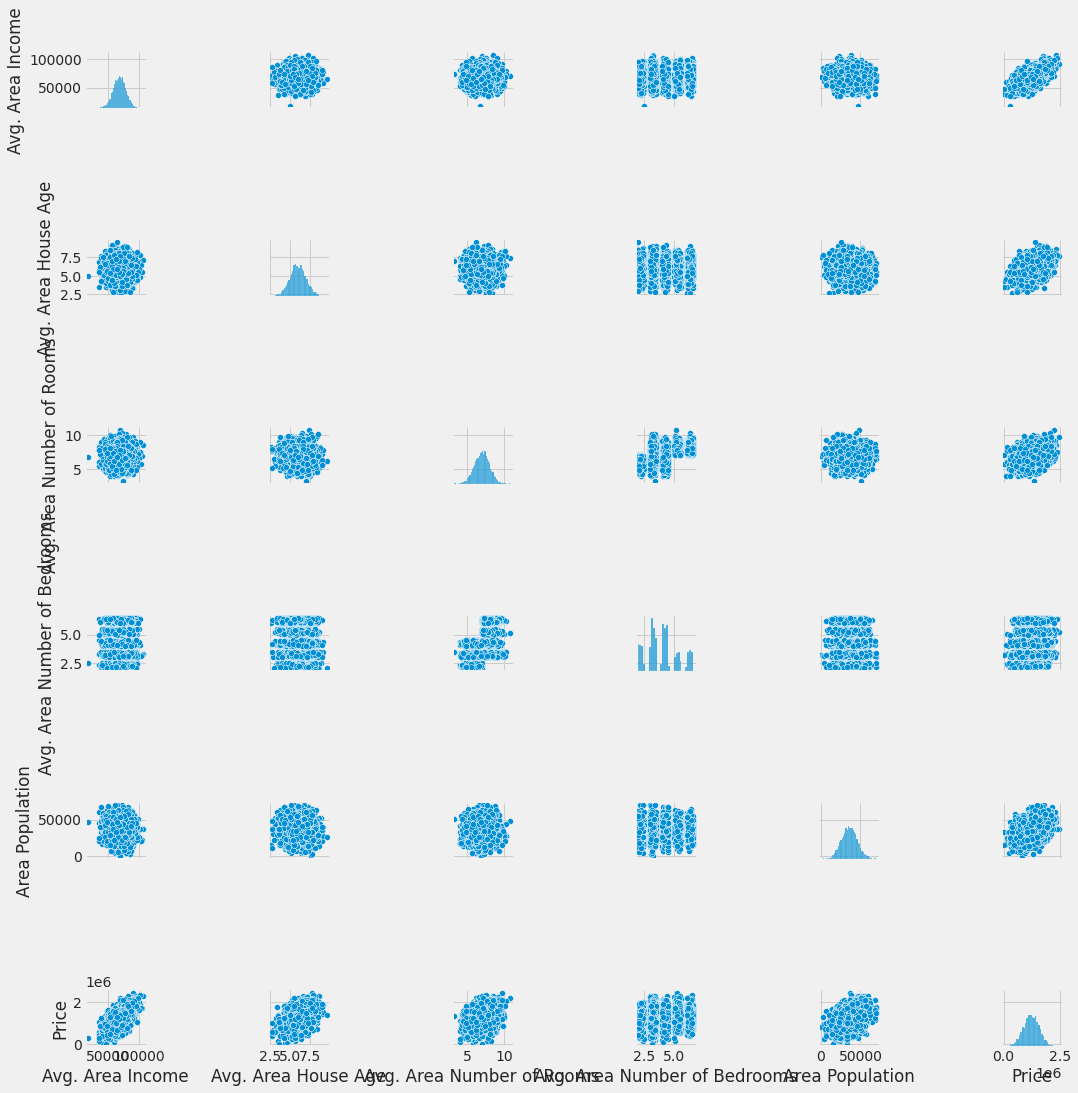

In [ ]:
sns.pairplot(USAhousing)

In [ ]:
sns.distplot(USAhousing['Price'])

## Entrenamiento de un modelo de regresión lineal

Primero necesitaremos dividir nuestros datos en una matriz **X** que contiene las características para entrenar y una matriz **Y** con la variable de destino, en este caso la columna Precio. Desecharemos la columna Dirección porque solo tiene información de texto que el modelo de regresión lineal no puede usar.




### Matrices *X* e *Y*

In [ ]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

y = USAhousing['Price']

## Data de entrenamiento y prueba

Ahora dividamos los datos en un conjunto de entrenamiento y un conjunto de prueba. Entrenaremos el modelo en el conjunto de entrenamiento y luego usaremos el conjunto de prueba para evaluar el modelo.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

#Función para las métricas

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Preparación de datos para la regresión lineal

La regresión lineal se ha estudiado en profundidad y hay mucha literatura sobre cómo se deben estructurar los datos para hacer un mejor uso del modelo.

- **Supuesto lineal**: La regresión lineal asume que la relación entre la variable dependiente e independiente es lineal.  

- **Eliminar colinealidad**: La regresión lineal sobre-ajustará sus datos cuando tenga variables de entrada altamente correlacionadas.  

- **Distribuciones gaussianas**: La regresión lineal hará predicciones más confiables si sus variables de entrada y salida tienen una distribución gaussiana.  

- **Reescalar las entradas**: La regresión lineal a menudo hará predicciones más confiables si reescala las variables de entrada usando la estandarización o la normalización.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# 1. Regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

## Evaluación del modelo

Evaluemos el modelo comprobando sus coeficientes y cómo podemos interpretarlos.

In [ ]:
# print the intercept
print(lin_reg.intercept_)

1228219.1492415662


In [ ]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119
Area Population,151252.342377


## Predicción de nuestro modelo



In [ ]:
pred = lin_reg.predict(X_test)

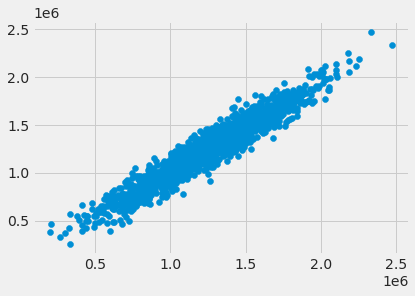

In [ ]:
plt.scatter(y_test, pred)

**Residual Histogram**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


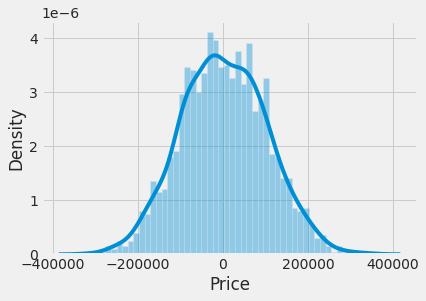

In [ ]:
sns.distplot((y_test - pred), bins=50);

## Métricas de evaluación

A continuación se muestra las métricas de evaluación más comunes para problemas de regresión:

**1. Error absoluto medio (MAE)**
\begin{equation}
\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|
\end{equation}

**2. Error cuadrático medio (MSE)**
\begin{equation}
\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2
\end{equation}

**3. Raíz del Error cuadrático medio (RMSE)**
\begin{equation}
\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}
\end{equation}

**4. R al cuadrado (R²)**
\begin{equation}
R^2 = \frac{SCR}{SCT} = 1 - \frac{SCE}{SCT}
\end{equation}

In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
R2 Square 0.9146818498754016
Train set evaluation:
_____________________________________
MAE: 81480.49973174892
MSE: 10287043161.197224
RMSE: 101425.06180031257
R2 Square 0.9192986579075526


In [ ]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379


# 2. Regresión de Ridge

Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

Para la estimación de los coeficientes en mínimos cuadrados debemos minimizar la suma de los errores al cuadrado. Para generar una regresión tipo rigde agregamos la penalización y mínimizamos la expresión:

\begin{equation}
\sum_{i=1}^n{(y_i - \beta_o - \sum_{j=1}^p{\beta_jx_{ij}})^2} + \lambda\sum_{j=1}^p{\beta_{j}^2}
\end{equation}

Donde la primera expresión es la suma de los errores al cuadrado y es un parámetro que debe ser tuneado.

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81428.64835535336
MSE: 10153269900.892609
RMSE: 100763.43533689494
R2 Square 0.9139628674464607
Train set evaluation:
_____________________________________
MAE: 81972.39058585507
MSE: 10382929615.143456
RMSE: 101896.66145239232
R2 Square 0.9185464334441484


In [ ]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379


# 3. Regressión LASSO

A diferencia de Ridge, matemáticamente el único cambio es que ahora los coeficientes de la penalización están en valor absoluto en vez de elevados al cuadrado. Esto tiene efectos distintos a la ridge:  

- No penaliza de la misma manera a los coeficientes muy grandes.
- En la regresión Ridge los coeficientes tienden hacia cero, en la regresión Lasso los coeficientes puede volverse cero, lo que implica que la regresión Lasso tiene otro efecto y es que automáticamente depura las variables que no agregan poder predictivo al modelo.

\begin{equation}
\sum_{i=1}^n{(y_i - \beta_o - \sum_{j=1}^p{\beta_jx_{ij}})^2} + \lambda\sum_{j=1}^p{|\beta_{j}|}
\end{equation}

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.6985172622
MSE: 10068453390.364523
RMSE: 100341.68321472648
R2 Square 0.914681588551116
Train set evaluation:
_____________________________________
MAE: 81480.63002185506
MSE: 10287043196.634295
RMSE: 101425.0619750084
R2 Square 0.9192986576295505


In [ ]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379


# 4. Elastic Net

Es una combinación de Ridge y Lasso. Se decide entonces qué peso se le da a cada método de penalización y se implementa la regresión:


\begin{equation}
\sum_{i=1}^n{(y_i - \beta_o - \sum_{j=1}^p{\beta_jx_{ij}})^2} + \lambda_{1}\sum_{j=1}^p{\beta_{j}^2} +\lambda_{2}\sum_{j=1}^p{|\beta_{j}|}
\end{equation}

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81184.43147330944
MSE: 10078050168.470106
RMSE: 100389.49232100991
R2 Square 0.9146002670381437
Train set evaluation:
_____________________________________
MAE: 81577.88831531754
MSE: 10299274948.10146
RMSE: 101485.34351373828
R2 Square 0.9192027001474953


In [ ]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
3,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545


# 5. Regresión polinomial

Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

La Regresión Polinomial es un caso especial de la Regresión Lineal, enriquece el modelo lineal al aumentar predictores adicionales, obtenidos al elevar cada uno de los predictores originales a una potencia. Por ejemplo, una regresión cúbica utiliza tres variables, como predictores. Este enfoque proporciona una forma sencilla de proporcionar un ajuste no lineal a los datos.

\begin{equation}
y_i = \beta_0 + \beta_1x_i + \beta_2x^2_i + \beta_3x^3_i + \epsilon_i
\end{equation}


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81174.51844119697
MSE: 10081983997.620697
RMSE: 100409.08324260658
R2 Square 0.914566932419506
Train set evaluation:
_____________________________________
MAE: 81363.0618562117
MSE: 10266487151.007816
RMSE: 101323.67517519198
R2 Square 0.9194599187853729


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [ ]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
3,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
4,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000


# 6. Descenso de gradiente estocástico

Es un algoritmo de optimización muy genérico capaz de encontrar soluciones óptimas a una amplia gama de problemas. La idea general es ajustar los parámetros de forma iterativa para minimizar una función de coste. 



In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.5677536055
MSE: 10068423225.52857
RMSE: 100341.5329040202
R2 Square 0.9146818441629548
Train set evaluation:
_____________________________________
MAE: 81480.50234692218
MSE: 10287043161.328657
RMSE: 101425.0618009605
R2 Square 0.9192986579065214


In [ ]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
3,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
4,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
5,Stochastic Gradient Descent,81135.567754,1.006842e+10,100341.532904,0.914682,0.000000


# 7. Regresión usando Random Forest

- El **Random Forest** es un algoritmo de aprendizaje supervisado que utiliza un método de aprendizaje por conjuntos para clasificación y regresión.

- Los **Random Forest** es una técnica de **bagging** y no una técnica de **boosting**. Los árboles en bosques aleatorios se ejecutan en paralelo. No hay interacción entre estos árboles mientras se construyen.

- Funciona construyendo una multitud de árboles de decisión en el momento del entrenamiento y generando la clase que es el modo de las clases (clasificación) o la predicción media (regresión) de los árboles individuales.

<img src="RandomForest.png">


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 94191.80602241628
MSE: 14126709674.426624
RMSE: 118855.83567678377
R2 Square 0.8802925949307072
Train set evaluation:
_____________________________________
MAE: 35266.66620221982
MSE: 1984739243.5500212
RMSE: 44550.412383613475
R2 Square 0.9844298193224073


In [ ]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
3,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
4,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
5,Stochastic Gradient Descent,81135.567754,1.006842e+10,100341.532904,0.914682,0.000000
6,Random Forest Regressor,94191.806022,1.412671e+10,118855.835677,0.880293,0.000000


# 8. Regresión usando SVM

- Las máquinas de vectores de soporte (SVM) son bien conocidas en problemas de clasificación. Sin embargo, el uso de SVM en regresión no está tan bien documentado. Estos tipos de modelos se conocen como regresión de vectores de soporte (SVR).

- Las máquinas de vectores de soporte (SVM) son bien conocidas en problemas de clasificación. Sin embargo, el uso de SVM en regresión no está tan bien documentado. Estos tipos de modelos se conocen como regresión de vectores de soporte (SVR).

- En contraste con MCO, la función objetivo de la RVS es minimizar los coeficientes, más específicamente, la norma del vector de coeficientes, no el error al cuadrado.


In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 87205.73051021634
MSE: 11720932765.275513
RMSE: 108263.25676458987
R2 Square 0.9006787511983232
Train set evaluation:
_____________________________________
MAE: 73692.5684807321
MSE: 9363827731.411337
RMSE: 96766.87310960986
R2 Square 0.9265412370487783


In [ ]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
3,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
4,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
5,Stochastic Gradient Descent,81135.567754,1.006842e+10,100341.532904,0.914682,0.000000
6,Random Forest Regressor,94191.806022,1.412671e+10,118855.835677,0.880293,0.000000
7,SVM Regressor,87205.730510,1.172093e+10,108263.256765,0.900679,0.000000


# 9. Comparación de modelos

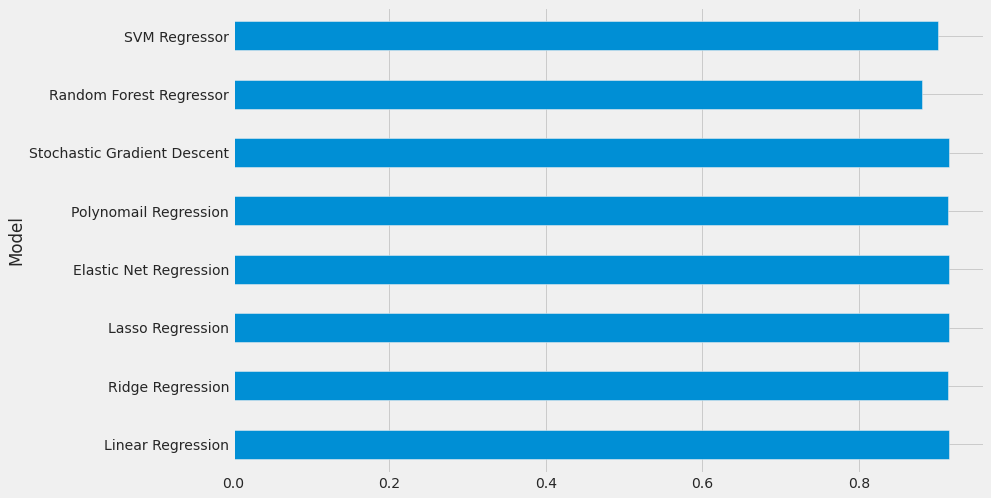

In [ ]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

# Conclusiones

- En este notebook se desarrollo los diferentes algoritmos de aprendizaje automático basados en la regresión, asi como las métricas necesarias para la validación del algoritmo. Recordar que existen otros algoritmos y/o modelos como: La regresión t-student, regresión lineal bayesiana, teoría de cópulas,  árboles de decisión, etc.

- El mejor modelo para nuestro conjunto de datos, según las métricas de evaluación es el: "Regresión LINEAL".


## Referencias:

- [Scikit-learn library](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

- [Linear Regression for Machine Learning by Jason Brownlee PhD](https://machinelearningmastery.com/linear-regression-for-machine-learning/)

- An Introduction to Statistical Learning: with Applications in R (Springer Texts in Statistics).

- Linear Models with R by Julian J.Faraway.

- An Introduction to Statistical Learning by James, Gareth et al.

- Applied Predictive Modeling by Max Kuhn and Kjell Johnson.

- <https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/>

- <https://medium.com/datos-y-ciencia/machine-learning-supervisado-fundamentos-de-la-regresi%C3%B3n-lineal-bbcb07fe7fd>

